## Impact of COVID19

### EDA

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv("data/WomenDHS.csv")
df

,UniqueID,Residence,Education,HouseHeadSex,Age,NumChild,WealthIndexOriginal,WealthIndex
0,1,Rural,No Education,Male,38,8,-51074,162269
1,2,Rural,Incomplete Primary,Male,17,0,-51074,162269
2,3,Rural,Incomplete Primary,Male,42,6,-50742,162601
3,4,Rural,No Education,Male,46,9,-50137,163206
4,5,Rural,No Education,Male,17,1,-50137,163206
...,...,...,...,...,...,...,...,...
15678,15679,Urban,Incomplete Primary,Male,17,0,85862,299205
15679,15680,Urban,No Education,Male,33,2,147305,360648
15680,15681,Urban,Incomplete Primary,Male,25,1,186851,400194
15681,15682,Urban,Incomplete Primary,Male,18,0,186851,400194


In [72]:
## check for number of variables and observations
df.shape

(15683, 8)

In [73]:
## check missing values
df.isna().sum()

UniqueID               0
Residence              0
Education              0
HouseHeadSex           0
Age                    0
NumChild               0
WealthIndexOriginal    0
WealthIndex            0
dtype: int64

In [74]:
## check duplicates
df.duplicated(subset=['UniqueID']).sum()

0

In [75]:
## check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15683 entries, 0 to 15682
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UniqueID             15683 non-null  int64 
 1   Residence            15683 non-null  object
 2   Education            15683 non-null  object
 3   HouseHeadSex         15683 non-null  object
 4   Age                  15683 non-null  int64 
 5   NumChild             15683 non-null  int64 
 6   WealthIndexOriginal  15683 non-null  int64 
 7   WealthIndex          15683 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 980.3+ KB


In [76]:
## check unique values for each variable
df.nunique()

UniqueID               15683
Residence                  2
Education                  6
HouseHeadSex               2
Age                       35
NumChild                  13
WealthIndexOriginal    11935
WealthIndex            11935
dtype: int64

In [77]:
## Descriptive stat

df.describe()

,UniqueID,Age,NumChild,WealthIndexOriginal,WealthIndex
count,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000
mean,7842.000000,27.937321,2.325639,10621.310209,223964.310209
std,4527.436471,9.159282,2.472988,105301.347989,105301.347989
min,1.000000,15.000000,0.000000,-213343.000000,0.000000
25%,3921.500000,20.000000,0.000000,-61526.500000,151816.500000
50%,7842.000000,27.000000,2.000000,-33659.000000,179684.000000
75%,11762.500000,35.000000,4.000000,88720.000000,302063.000000
max,15683.000000,49.000000,12.000000,309962.000000,523305.000000


In [78]:
## Number of catgorical and numerical features
categirical_features = [f for f in df.columns if df[f].dtype == "O"] # "O" -> Object
num_categirical_features = len(categirical_features)
numeric_features = [f for f in df.columns if df[f].dtype != "O"]
num_numeric_features = len(numeric_features)

print(num_categirical_features, categirical_features)
print(num_numeric_features, numeric_features)

3 ['Residence', 'Education', 'HouseHeadSex']
5 ['UniqueID', 'Age', 'NumChild', 'WealthIndexOriginal', 'WealthIndex']


In [79]:
categorical_features = df.select_dtypes(include="object").columns
print(categorical_features)
numeric_features = df.select_dtypes(exclude="object").columns
print(numeric_features)

Index(['Residence', 'Education', 'HouseHeadSex'], dtype='object')
Index(['UniqueID', 'Age', 'NumChild', 'WealthIndexOriginal', 'WealthIndex'], dtype='object')


### Histogram and KDE

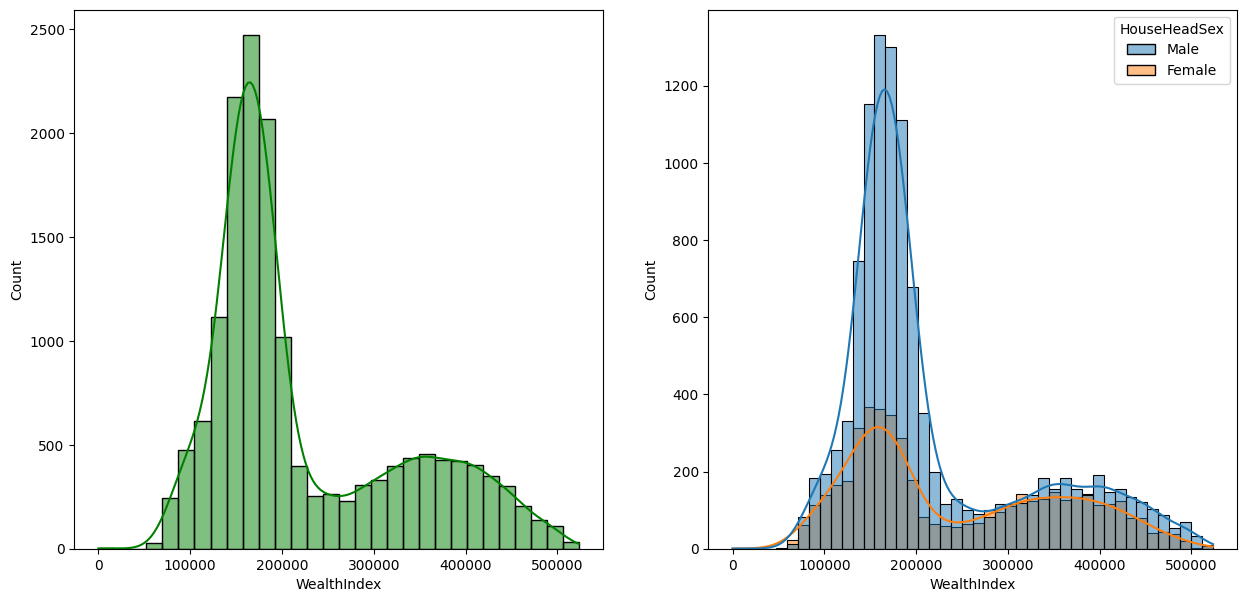

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='WealthIndex', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='WealthIndex', kde=True, hue='HouseHeadSex')
plt.show()

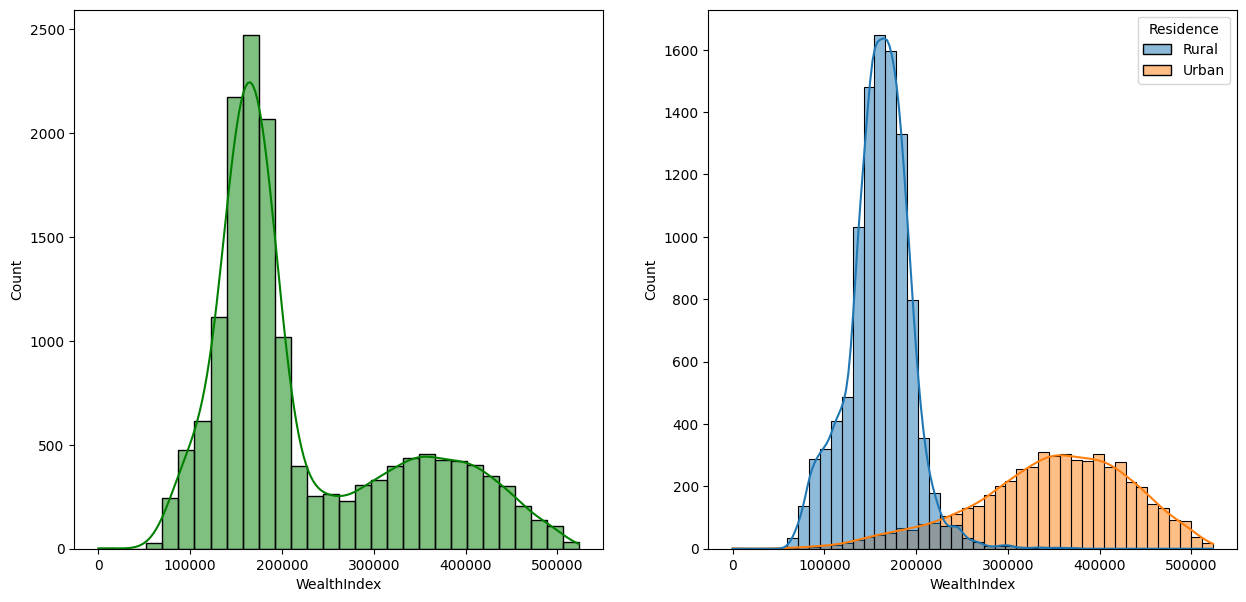

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='WealthIndex', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='WealthIndex', kde=True, hue='Residence')
plt.show()

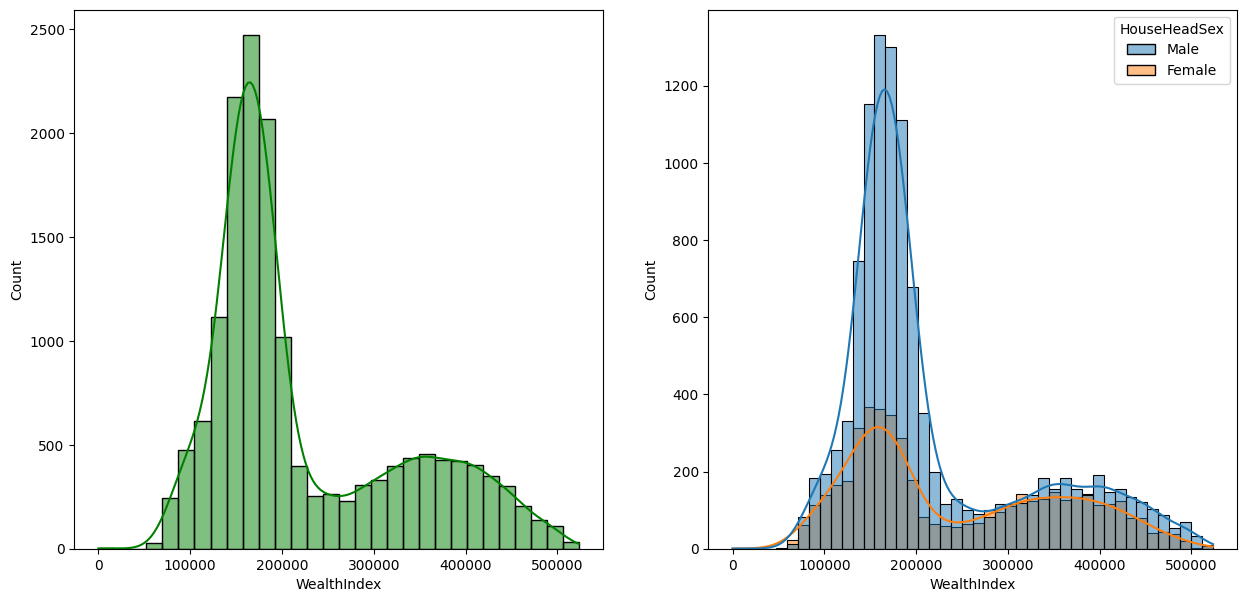

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='WealthIndex', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='WealthIndex', kde=True, hue='HouseHeadSex')
plt.show()

* Females are more affected by COVID19 than males

### Modeling

In [83]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
X = df.drop(columns=["UniqueID", "WealthIndexOriginal", "WealthIndex"])
X

,Residence,Education,HouseHeadSex,Age,NumChild
0,Rural,No Education,Male,38,8
1,Rural,Incomplete Primary,Male,17,0
2,Rural,Incomplete Primary,Male,42,6
3,Rural,No Education,Male,46,9
4,Rural,No Education,Male,17,1
...,...,...,...,...,...
15678,Urban,Incomplete Primary,Male,17,0
15679,Urban,No Education,Male,33,2
15680,Urban,Incomplete Primary,Male,25,1
15681,Urban,Incomplete Primary,Male,18,0


In [87]:
y = df["WealthIndex"]
y

0        162269
1        162269
2        162601
3        163206
4        163206
          ...  
15678    299205
15679    360648
15680    400194
15681    400194
15682    301054
Name: WealthIndex, Length: 15683, dtype: int64

### Feature Transformations

In [88]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [89]:
cat_features, num_features

(Index(['Residence', 'Education', 'HouseHeadSex'], dtype='object'),
 Index(['Age', 'NumChild'], dtype='object'))

In [90]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [91]:
numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

In [92]:
print(numeric_transformer, onehot_transformer)

StandardScaler() OneHotEncoder()


In [93]:
preprocessor = ColumnTransformer([
    ("OneHotEncoder", onehot_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
    ])

In [94]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.09866691,  2.29460912],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -1.1941623 , -0.94044655],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.53539628,  1.48584521],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.32070355, -0.53606459],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -1.08497995, -0.94044655],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.75743292, -0.94044655]])

In [95]:
X.shape

(15683, 12)

### Train and Test Split

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)
X_train.shape, X_test.shape

((12546, 12), (3137, 12))

In [97]:
def evaluate_model(actual, predicted):
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(actual, predicted)    
    return MAE, MSE, RMSE, R2

In [98]:
models = {
    ## Linear models
    "Linear" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet(),
    ## Tree-based regressions
    "K-Neighbors" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "CatBoosting" : CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [99]:
num_models = len(models)
model_type = list(models.keys())
model_type

['Linear',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'K-Neighbors',
 'Decision Tree',
 'Random Forest',
 'XGBoost',
 'CatBoosting',
 'AdaBoost',
 'Gradient Boosting']

In [100]:
models = list(models.values())
models

[LinearRegression(),
 Lasso(),
 Ridge(),
 ElasticNet(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 AdaBoostRegressor(),
 GradientBoostingRegressor()]

In [101]:
train_MAEs = []
train_RMSEs = []
train_R2s = []

test_MAEs = []
test_RMSEs = []
test_R2s = []

for model in models:
    ## Train model
    model.fit(X_train, y_train)
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    ## Evaluate train and test
    train_mae, _, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, _, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    ## Append results
    train_MAEs.append(train_mae)
    train_RMSEs.append(train_rmse)
    train_R2s.append(train_r2)

    test_MAEs.append(test_mae)
    test_RMSEs.append(test_rmse)
    test_R2s.append(test_r2)

In [102]:
results = pd.DataFrame(
    list(zip(model_type, 
             train_MAEs, train_RMSEs, train_R2s,
             test_MAEs, test_RMSEs, test_R2s)),
    columns=["Model",
             "Train_MAE", "Train_RMSE", "Train_R2",
             "Test_MAE", "Test_RMSE", "Test_R2"]
).sort_values(by=["Test_R2"],ascending=False)
results

,Model,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
10,Gradient Boosting,34872.557160,49473.681023,0.779885,35576.511378,50711.927717,0.765277
8,CatBoosting,33188.102361,47043.549807,0.800978,35704.318032,50944.136099,0.763122
7,XGBoost,32222.242354,45869.777807,0.810785,36273.512425,51903.821304,0.754114
1,Lasso,36783.895926,51902.170036,0.757745,36886.919599,52597.909955,0.747493
2,Ridge,36784.417807,51902.175953,0.757745,36887.543530,52597.954719,0.747493
0,Linear,36793.457437,51906.122942,0.757708,36890.212305,52605.612967,0.747419
9,AdaBoost,37725.319304,52819.872218,0.749102,37812.001340,53283.334775,0.740869
6,Random Forest,30841.605763,43914.872826,0.826570,37276.512447,53347.802406,0.740242
4,K-Neighbors,35071.454886,49618.784055,0.778592,38052.465413,54195.695525,0.731919
5,Decision Tree,29470.203250,43299.705532,0.831395,38856.308392,56072.570566,0.713030
